In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [2]:
data = pd.read_csv('data.txt', header = None)

Apuesta = np.array(data[0])
Ruleta = np.array(data[1])
Bolsillo = np.array(data[2])
Tipo_Apuesta = np.array(data[3])

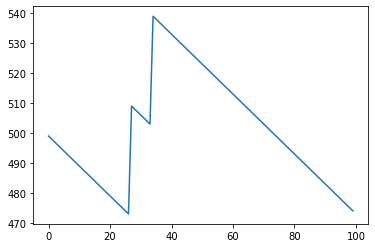

In [3]:
p1 = plt.plot(Bolsillo[0:100])

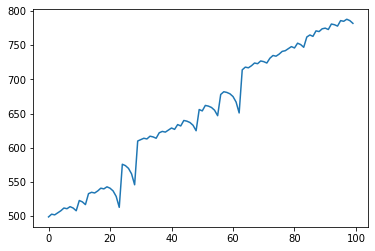

In [4]:
p2 = plt.plot(Bolsillo[100:200])

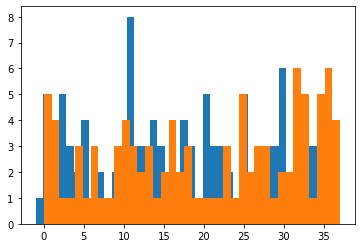

In [5]:
plt.hist(Ruleta[0:100], bins=38)
plt.hist(Ruleta[100:200], bins=38)
plt.show()

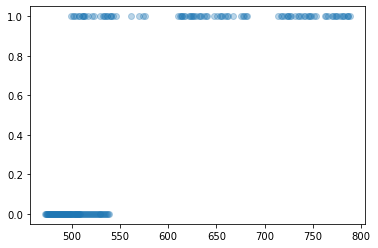

In [6]:
plt.scatter(Bolsillo, Tipo_Apuesta, alpha=0.3)

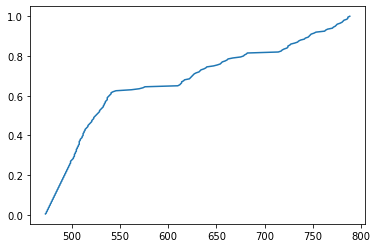

In [7]:
Bolsillo = np.sort(Bolsillo)
frac_acumulativa = np.linspace(1.0/len(Bolsillo), 1.0, len(Bolsillo))

plt.plot(Bolsillo, frac_acumulativa)

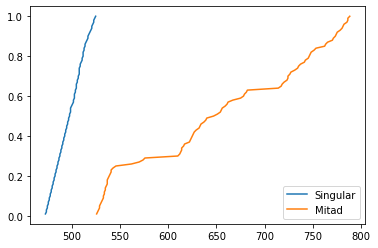

In [8]:
apuesta_singu = Tipo_Apuesta == 0
apuesta_mitad = Tipo_Apuesta == 1
n_apuesta_sing = np.count_nonzero(apuesta_singu)
n_apuesta_mitad = np.count_nonzero(apuesta_mitad)

plt.plot(Bolsillo[apuesta_singu], np.linspace(1.0/n_apuesta_sing, 1.0, n_apuesta_sing), label='Singular')
plt.plot(Bolsillo[apuesta_mitad], np.linspace(1.0/n_apuesta_mitad, 1.0, n_apuesta_mitad), label='Mitad')
plt.legend()

In [9]:
real_diff = np.mean(Bolsillo[apuesta_singu]) - np.mean(Bolsillo[apuesta_mitad])
print(real_diff)

-154.83000000000004


In [10]:
n_iter = 100000
diffs = np.zeros(n_iter)
for i in range(n_iter):
    np.random.shuffle(Bolsillo)
    Bolsillo_alterno_sing = Bolsillo[:n_apuesta_sing]
    Bolsillo_alterno_mitad = Bolsillo[n_apuesta_sing:]
    diffs[i] = np.mean(Bolsillo_alterno_sing) - np.mean(Bolsillo_alterno_mitad)

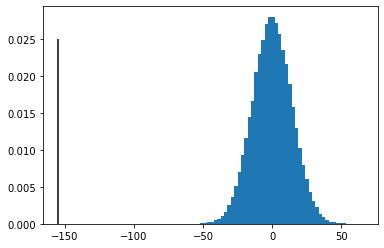

In [11]:
plt.hist(diffs, bins=50, density=True)
plt.vlines(real_diff, 0, 0.025, color = 'black')
plt.show()

In [12]:
frac_bajos = np.count_nonzero(diffs<real_diff)/len(diffs)
print(frac_bajos)

0.0
